# 1.EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
#from pycaret.regression import *


In [ ]:
train_data = pd.read_csv("./train.tsv", sep="\t")
test_data = pd.read_csv("./test.tsv", sep="\t")

In [ ]:
dict_columns = ['belongs_to_collection','genres','spoken_languages','production_companies',
                'production_countries','Keywords','cast','crew']

def text_to_dict(df):
    for columns in dict_columns:
        df[columns] = df[columns].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

train_data = text_to_dict(train_data)


In [ ]:
test_data = text_to_dict(test_data)

## a. Which features are available in the dataset

In [ ]:
train_data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew,release_year,release_month
count,4638,5215,5.215000e+03,5215,1766,5215.000000,5200,5215,5215,5209,5215.000000,5048,5215,5215,5215,5.215000e+03,5211.000000,5215,5215,4190,5215,5215,5215.000000,5215.000000,5215,5215,5215,5215.000000,5215.000000
unique,4638,712,NaN,1257,1754,NaN,5200,43,5161,5206,NaN,5048,4261,484,3782,NaN,NaN,591,1,4181,5154,2,NaN,NaN,4709,5206,5209,NaN,NaN
top,/ugFOHcNFJ45ZQa8bfjrSQBHUnHS.jpg,{},NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.sexandthecitymovie.com/,NaN,tt1532382,en,The Magnificent Seven,No overview found.,NaN,/m9k2MCvZJWkV5DfJY9fueeeqNxb.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2014-12-25 00:00:00,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Pulse,False,NaN,NaN,[],[],[],NaN,NaN
freq,1,4150,NaN,404,2,NaN,1,4385,2,2,NaN,1,170,3016,7,NaN,NaN,3176,5215,2,3,5197,NaN,NaN,400,10,7,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1915-02-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.147967e+07,NaN,NaN,98768.673442,NaN,NaN,NaN,NaN,10.016559,NaN,NaN,NaN,NaN,6.538743e+07,108.027442,NaN,NaN,NaN,NaN,NaN,6.399099,1062.859636,NaN,NaN,NaN,2000.802876,6.915820
std,NaN,NaN,3.631509e+07,NaN,NaN,143992.708567,NaN,NaN,NaN,NaN,7.075799,NaN,NaN,NaN,NaN,1.432381e+08,22.740973,NaN,NaN,NaN,NaN,NaN,0.943931,2097.172266,NaN,NaN,NaN,15.990835,3.370261
min,NaN,NaN,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,1.519000,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,1915.000000,1.000000
25%,NaN,NaN,0.000000e+00,NaN,NaN,10136.000000,NaN,NaN,NaN,NaN,6.264000,NaN,NaN,NaN,NaN,2.360718e+06,94.000000,NaN,NaN,NaN,NaN,NaN,5.900000,74.000000,NaN,NaN,NaN,1993.000000,4.000000


In [ ]:
train_data.release_date = pd.to_datetime(train_data.release_date)
train_data['release_year'] = train_data.release_date.apply(lambda x: x.year)
train_data['release_month'] = train_data.release_date.apply(lambda x: x.month)

In [ ]:
train_data

,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,Keywords,cast,crew,release_year,release_month
0,/7IBpOrw0ATwL1AOV97mtsceDpYs.jpg,"{'id': 556, 'name': 'Spider-Man Collection', '...",258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",https://www.sonypictures.com/movies/spiderman3,559,tt0413300,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,22.024,/2N9lhZg6VtVJoGCZDjXVC3a81Ea.jpg,"[{'id': 19551, 'logo_path': '/2WpWp9b108hizjHK...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,False,6.2,8180,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",2007,5
1,/lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg,"{'id': 256296, 'name': 'Silent Night, Deadly N...",250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,50719,tt0093974,en,"Silent Night, Deadly Night Part 2",After being traumatized by his brother Billy's...,4.756,/64ATtm2eMd0yfrTJsHANQ0NmMSn.jpg,"[{'id': 18924, 'logo_path': None, 'name': 'Sil...","[{'iso_3166_1': 'US', 'name': 'United States o...",1987-04-10,154323,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The nightmare is about to begin ... AGAIN!,"Silent Night, Deadly Night Part 2",False,4.3,68,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'cast_id': 1000, 'character': 'Ricky Caldwel...","[{'credit_id': '52fe47d4c3a36847f814a70f', 'de...",1987,4
2,/gVXLIfMR2hLmkn0nACctlMCJBfx.jpg,{},0,"[{'id': 99, 'name': 'Documentary'}]",https://www.scottymovie.com/,469062,tt2773246,en,Scotty and the Secret History of Hollywood,A deliciously scandalous portrait of unsung Ho...,4.746,/2uXDNXBoIrRBbfpVrvegoLr8OVt.jpg,"[{'id': 88564, 'logo_path': '/pn3p12IC4Tb0K8re...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-07-27,176236,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Scotty and the Secret History of Hollywood,False,6.5,15,"[{'id': 158718, 'name': 'lgbt'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '5980e931c3a3680cfb002d0e', 'de...",2018,7
3,/rKjE17ncAGNzeImNWbdGTimzjtk.jpg,"{'id': 8917, 'name': 'Hellraiser Collection', ...",1000000,"[{'id': 27, 'name': 'Horror'}]",NaN,9003,tt0093177,en,Hellraiser,An unfaithful wife encounters the zombie of he...,13.828,/4nfAhOTlfZUHNorHJXEib7GYFpp.jpg,"[{'id': 1950, 'logo_path': None, 'name': 'New ...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1987-09-11,14564027,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He'll tear your soul apart.,Hellraiser,False,6.9,1115,"[{'id': 1449, 'name': 'underworld'}, {'id': 31...","[{'cast_id': 15, 'character': 'Larry Cotton', ...","[{'credit_id': '533fd9260e0a262b92001027', 'de...",1987,9
4,/zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg,"{'id': 108693, 'name': 'National Lampoon's Vac...",15000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 12, 'nam...",NaN,11153,tt0085995,en,National Lampoon's Vacation,Clark Griswold is on a quest to take his famil...,15.070,/ySI88wO1IFyKGWpSKRTSPilE3t2.jpg,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'US', 'name': 'United States o...",1983-07-28,61399552,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every summer Chevy Chase takes his family on a...,National Lampoon's Vacation,False,7.1,782,"[{'id': 5493, 'name': 'relatives'}, {'id': 731...","[{'cast_id': 1, 'character': 'Clark Griswold',...","[{'credit_id': '52fe44039251416c75025f27', 'de...",1983,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,NaN,"{'id': 239968, 'name': 'La cage aux folles Col...",0,"[{'id': 35, 'name': 'Comedy'}]",

In [ ]:
train_data.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Keywords', 'cast', 'crew',
       'release_year', 'release_month'],
      dtype='object')

**backdrop_path** : the image poster filename. It won't be useful to our mission unless we will get that image. <br>
**belongs_to_collection** : dictionary contains id of the series, path for the whole series poster, and path for the backdrop image. <br>
**budget** : the amount of money used to create the movie. <br>
**genres** : list of dictionaries where each dictionary represent one genre and contain the id of the genre and it's name. <br>
**homepage** : the url of the homepage of the movie. <br>
**id** : id of the movie. <br>
**imdb_id** : id of he movie at imdb site <br>
**original_language** : categorial feature represent the original lunguage of the movie.<br>
**original_title** : string contains the original title of the movie in native language. <br>
**overview** : string contain summary of the movie's plot.<br>
**popularity**: numeric variable which represent the movie's popularity level. This metric are biased toward movies from the more recent time and that is why we probably won't use it.<br>
**poster_path** : path to the poster image of the movie.<br>
**production_companies** : list of dictionaries where each dictionary represent one company and contain the id of the company and it's name. <br>
**production_countries** : list of dictionaries where each dictionary represent one country and contain the country code and name. <br>
**release_date** : string contains the release date of the movie. <br>
**revenue** : numeric variable of the amount of money the movie made in the teathres. In our case it is the variable we want to predict.<br>
**runtime** : numeric feature, the number of minutes.<br>
**spoken_languages** : list of dictionaries where each dictionary represent one language and contain the language code and name. <br>
**status** : the status of the movie (released or still in production). In our dataset every movie was released which makes this feature useless.<br>
**tagline** : string contains the tagline of the movie.<br>
**title** : string contains the title of the movie (always english).<br>
**video** : boolean variable, almost all values are False and we could'nt infer it's meaning.<br>
**vote_average** : numeric feature contains the average score given by the voters.<br>
**vote_count** : numeric feature contains the number of voters.<br>
**Keywords** : list of dictionaries where each dictionary represent one keyword and contain the id of the keyword and it's value. <br>
**cast** : list of dictionaries where each dictionary represent one character and the actor of it.<br>
**crew** : list of dictionaries where each dictionary represent a person who was involved in the making of the movie (production, director, etc).<br><br>
From this list we can immedietly see that there are columns that we wont use - at least as long as we are not allowed to enrich the data by external sources (or use pretrained models). This columns are: original_title, homepage, id, imbd_id, poster_path, tagline, title. For the rest of the columns we will explore thier potential value and if we can spot outliars that should be removed.


In [ ]:
cols_to_drop = ["original_title", "homepage", "id", "imbd_id", "poster_path", "tagline", "title", "overview"]

## b. Feature distribution and comparative analysis between features

### Continus Features:
We will first explore the correlation between our numerical features to our target - 'revenue'. In addition we would also look on how many missing values we have and what is the feature disturbition.



In [ ]:
numerical_features = ['popularity',	'runtime','budget', 'vote_average',	'vote_count']

def describe_numeric(data, feature):
  print(data.describe()[feature])
  sns.boxplot(data[feature])
  plt.title(feature)
  plt.show()
  print("Missing values:", len(data[(data[feature]==0) | (data[feature].isnull())]))
  data[feature].hist()
  plt.title(f"{feature} disturbition")
  plt.show()
  sns.regplot(data=data, y='revenue', x=feature)
  plt.title(f"{feature} vs. revenue")
  plt.show()

#### Popularity

count    5215.000000
mean       10.016559
std         7.075799
min         1.519000
25%         6.264000
50%         9.009000
75%        11.801000
max       151.237000
Name: popularity, dtype: float64


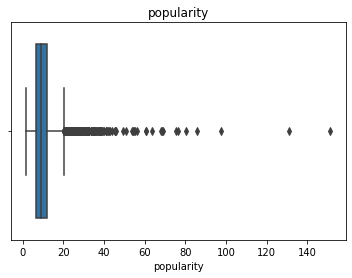

Missing values: 0


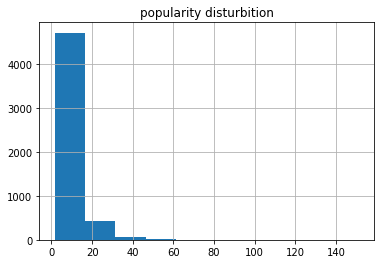

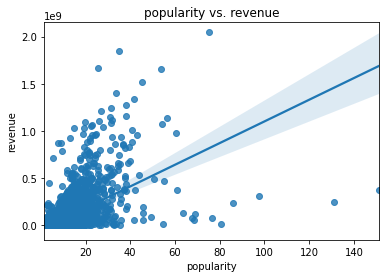

In [ ]:
describe_numeric(train_data, 'popularity')

We can see that there is no missing values, and the regression line suggested there is a strong correlation between the variables. However, it seems we might have some outliars. Let's examine them:


In [ ]:
cols_to_examin = ['title', 'release_date','budget', 'cast','original_language', 'overview', 'vote_average']
train_data.sort_values(by='popularity', ascending=False).head(20)[['popularity'] + cols_to_examin]

,popularity,title,release_date,budget,cast,original_language,overview,vote_average
2679,151.237,1917,2019-12-25,100000000,"[{'cast_id': 4, 'character': 'Lance Corporal S...",en,"At the height of the First World War, two youn...",8.0
3135,131.018,Parasite,2019-05-30,11363000,"[{'cast_id': 0, 'character': 'Kim Ki-taek', 'c...",ko,"All unemployed, Ki-taek's family takes peculia...",8.5
976,97.603,Knives Out,2019-11-27,40000000,"[{'cast_id': 1, 'character': 'Benoit Blanc', '...",en,When renowned crime novelist Harlan Thrombey i...,7.8
4129,85.858,Terminator: Dark Fate,2019-10-23,185000000,"[{'cast_id': 18, 'character': 'Daniela ""Dani"" ...",en,Decades after Sarah Connor prevented Judgment ...,6.3
2630,80.447,The Panti Sisters,2019-09-13,0,"[{'cast_id': 1, 'character': 'Gabriel Panti', ...",tl,Three gay sons are called back by their estran...,2.7
4587,76.434,Cats,2019-12-19,95000000,"[{'cast_id': 20, 'character': 'Victoria', 'cre...",en,A tribe of cats called the Jellicles must deci...,4.4
1996,75.144,Avengers: Infinity War,2018-04-25,300000000,"[{'cast_id': 1, 'character': 'Tony Stark / Iro...",en,As the Avengers and their allies have continue...,8.3
5125,69.143,Zombieland: Double Tap,2019-10-09,42000000,"[{'cast_id': 5, 'character': 'Tallahassee', 'c...",en,"Columbus, Tallahassee, Wichita, and Little Roc...",6.9
1136,68.561,Just Mercy,2019-12-25,25000000,"[{'cast_id': 0, 'character': 'Bryan Stevenson'...",en,The powerful true story of Harvard-educated la...,8.1
2087,67.772,Charlie's Angels,2019-11-14,48000000,"[{'cast_id': 6, 'character': 'Sabina Wilson', ...",en,When a systems engineer blows the whistle on a...,6.5


We can see that most of them indeed make sense. However, since according to the data decumantation this measure is highly influnced by the distance from the current time (as we can see, most movies are from 2019), we will need to make sure to handle it when using this feature in our model. In addition, as most values are below 10, and the mean value is much diffrent than the max one, z normalization would be more sutible than MinMax scaling.

#### Runtime

count    5211.000000
mean      108.027442
std        22.740973
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       465.000000
Name: runtime, dtype: float64


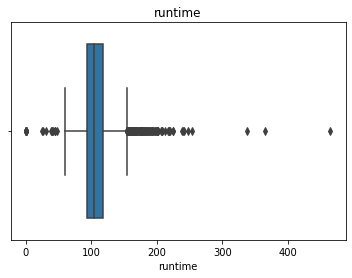

Missing values: 16


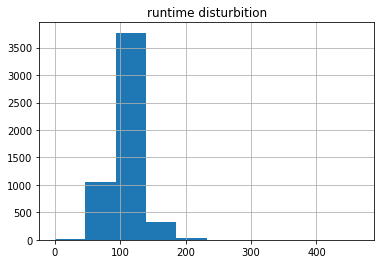

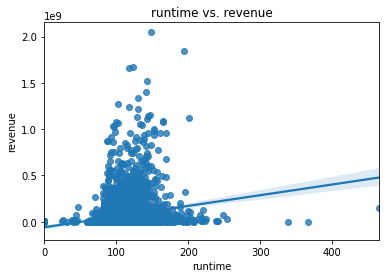

In [ ]:
describe_numeric(train_data, 'runtime')

Again, we can see that there might be some correlation. We should again examine the outliars:

In [ ]:
train_data.sort_values(by='runtime', ascending=False).head(10)[['runtime'] + cols_to_examin + ['revenue']]

,runtime,title,release_date,budget,cast,original_language,overview,vote_average,revenue
294,465.0,Live Aid,1985-07-13,0,"[{'cast_id': 1, 'character': '', 'credit_id': ...",en,"Live Aid was held on 13 July 1985, held simult...",7.8,150000000
4824,366.0,The Best of Youth,2003-06-22,0,"[{'cast_id': 1, 'character': 'Nicola Carati', ...",it,"Spanning four decades, from the chaotic 1960s ...",8.3,2693053
3814,338.0,Carlos,2010-10-11,18000000,"[{'cast_id': 4, 'character': 'Ilich Ramírez Sá...",en,"The story of Venezuelan revolutionary, Ilich R...",7.0,871279
3928,254.0,Gettysburg,1993-10-08,0,"[{'cast_id': 1, 'character': 'Col. Joshua Cham...",en,Summer 1863. The Confederacy pushes north into...,6.9,25000000
1365,248.0,Cleopatra,1963-06-12,31115000,"[{'cast_id': 2, 'character': 'Cleopatra', 'cre...",en,"Determined to hold on to the throne, Cleopatra...",7.0,71000000
3323,241.0,UFC 94: St-Pierre vs. Penn 2,2009-01-31,1091000,"[{'cast_id': 1, 'character': 'Himself', 'credi...",en,UFC 94: St-Pierre vs. Penn 2 was a mixed marti...,5.1,4290020
1069,240.0,WWE WrestleMania XXX,2014-04-06,0,"[{'cast_id': 2, 'character': 'Himself', 'credi...",en,WrestleMania XXX was the 30th annual WrestleMa...,7.8,10900000
1096,239.0,UFC 97: Redemption,2009-04-18,0,"[{'cast_id': 1, 'character': 'Himself', 'credi...",en,UFC 97: Redemption (not to be confused with UF...,5.6,4900000
4492,225.0,Woodstock,1970-03-26,600000,"[{'cast_id': 11, 'character': 'Himself', 'cred...",en,An intimate look at the Woodstock Music & Art ...,7.5,34505110
2718,224.0,Lagaan: Once Upon a Time in India,2001-06-15,5200000,"[{'cast_id': 1, 'character': 'Bhuvan', 'credit...",hi,"In 1890s India, an arrogant British commander ...",7.4,8100000


In [ ]:
# TODO: decide what to do with them

#### Vote Average

count    5215.000000
mean        6.399099
std         0.943931
min         0.000000
25%         5.900000
50%         6.400000
75%         7.100000
max        10.000000
Name: vote_average, dtype: float64


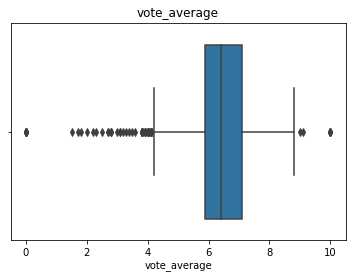

Missing values: 9


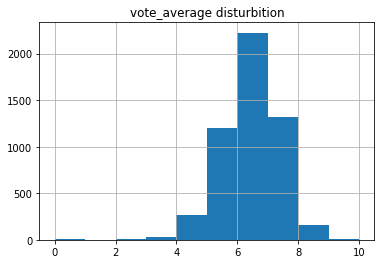

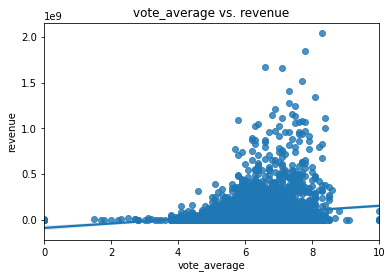

In [ ]:
describe_numeric(train_data, 'vote_average')

#### Vote count

count     5215.000000
mean      1062.859636
std       2097.172266
min          0.000000
25%         74.000000
50%        290.000000
75%       1028.000000
max      24834.000000
Name: vote_count, dtype: float64


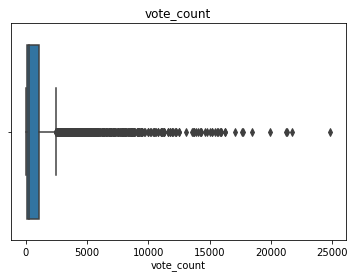

Missing values: 8


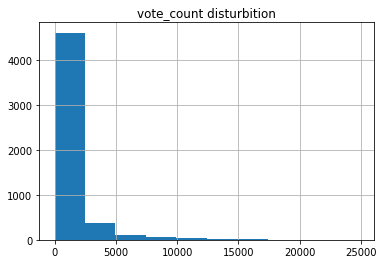

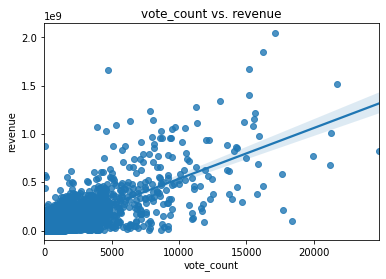

In [ ]:
describe_numeric(train_data, 'vote_count')

This result make sense, as if someone voted for the movie that means he saw the movie, and usually paid for it an contributed to its revanue.
Lets examine the interpolation of vote_count and vote_average:

count     5215.000000
mean       736.470986
std       1569.887734
min          0.000000
25%         46.035000
50%        182.040000
75%        671.190000
max      20612.220000
Name: vote_count_average, dtype: float64


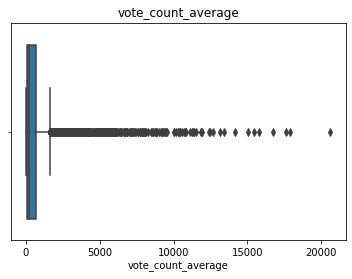

Missing values: 9


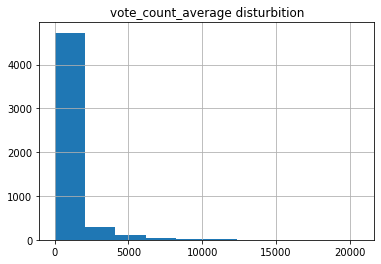

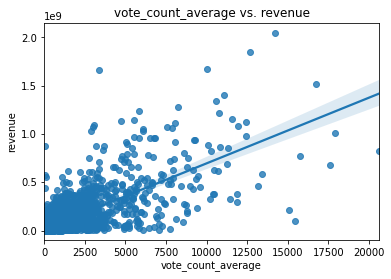

In [ ]:
train_data['vote_count_average'] = train_data.vote_count * train_data.vote_average/10
describe_numeric(train_data, 'vote_count_average')

The result is pretty much similar to vote_count, therfore we will not use this feature.

In [ ]:
train_data.drop(columns=['vote_count_average'], inplace=True)

#### Budget

count    5.215000e+03
mean     2.147967e+07
std      3.631509e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.500000e+06
75%      2.600000e+07
max      3.800000e+08
Name: budget, dtype: float64


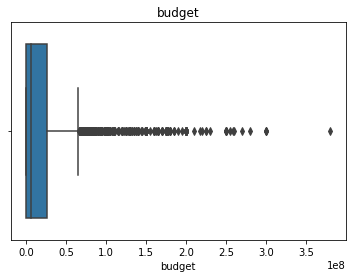

Missing values: 1487


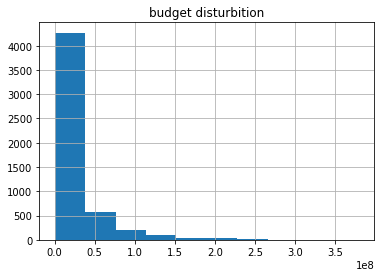

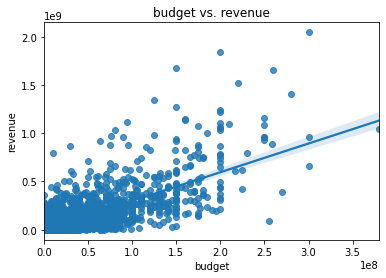

In [ ]:
describe_numeric(train_data, 'budget')

In [ ]:
# How many movies have budget of 0?
len(data[data.budget == 0])

1487

Where the budget is 0 we are treating it as missing value. In order to handle this issue we transformed the '0' value to None, so the automatic library we are using for modeling and handeling missing data will treat it as needed.

### Analyzing Through Time

In [ ]:
data_year = train_data.groupby("release_year")[numerical_features + ['revenue']].mean()

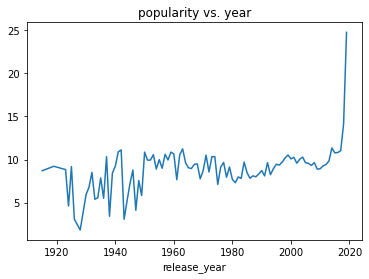

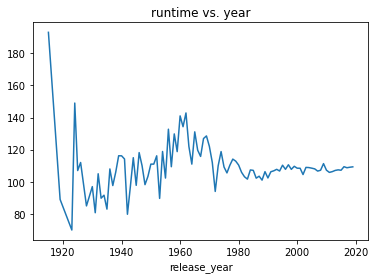

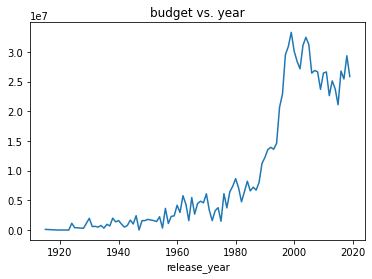

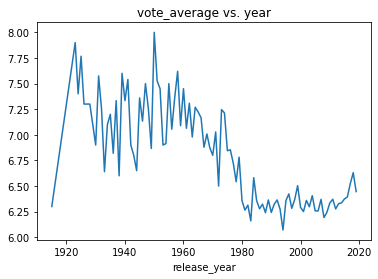

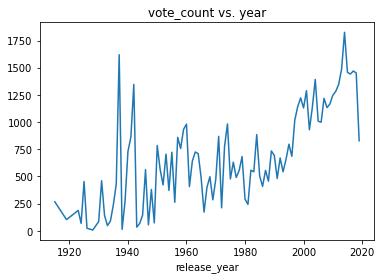

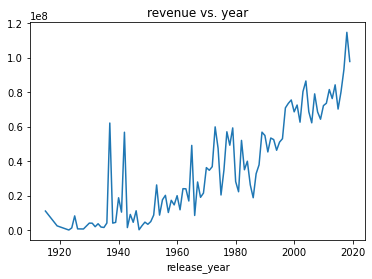

In [ ]:
for col in data_year.columns:
  data_year[col].plot(title = f"{col} vs. year")
  plt.show()

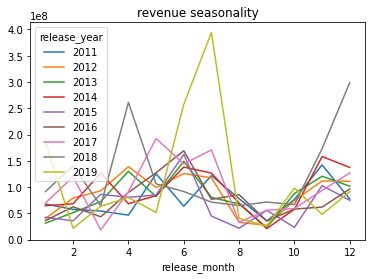

In [ ]:
# seasonality
data_month = train_data[train_data.release_year>2010].groupby(["release_year","release_month"])['revenue'].mean().reset_index()
data_month = pd.pivot(data_month, index='release_month', columns='release_year',values='revenue')
data_month.plot(title="revenue seasonality")
plt.show()

From the above we can notice two things:
1. The year is a continues feature, that also influnce diffrent variables, and espacially our label feature 'revanue' - the average revanue of movies is increacing by time
2. we can see that there is some sort of seasonality in the revanue, and therefor 'month' is a catagorical feature that might be useful to use.

### Directors and Actress

In [ ]:
# adding director
train_data['director'] = train_data.crew.apply(lambda x: [y['name'] for y in x if y['job']=='Director'])
train_data['director'] = train_data['director'].apply(lambda x: x[0] if len(x)>0 else None)

# adding top actress
train_data['actress'] = train_data.cast.apply(lambda x: '|'.join([y['name'] for y in x if y['order'] in ['0', '1','2']]))


In [ ]:
tmp  = train_data.groupby('director').count()['revenue'].reset_index()
tmp = tmp[tmp.revenue > 3]

#### Avg. revanue by director, that had at least 3 movies - showing top 20

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

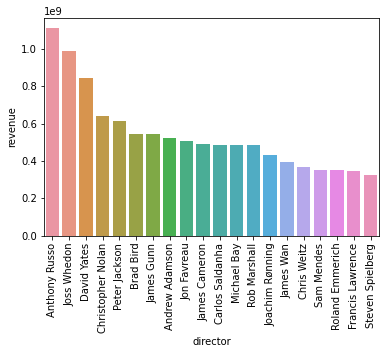

In [ ]:
dr = train_data.groupby('director')['revenue'].mean()[train_data.groupby('director').count()['revenue'] >2].reset_index().sort_values('revenue', ascending=False)
sns.barplot(x="director", y="revenue", data=dr.loc[dr.index[:20]])
plt.xticks(rotation=90)

## Feature Engineering



**The features we won't use:**<br>
backdrop_path, poster_path and homepage containing links and we aren't allowed to enrich our dataset.<br>
popularity because it is biased toward late release movies.<br>
ID and imdb_id does not hold any data.<br>
video because almost all values are False and we could'nt infer it's meaning.<br>
status because it is equal along all rows.<br>

**The features we will use:**<br>
The reamaing features, as we saw a justification for them in our EDA.

## Feature Engeneering:

In [ ]:
# making belongs_to_collection boolean
train_data["belongs_to_collection"] = train_data["belongs_to_collection"].notnull()

In [ ]:
cols_to_drop = ['backdrop_path', 'poster_path', 'homepage', 'popularity', 'imdb_id', 'id','video','status'
,'original_title','overview','production_companies','production_countries','spoken_languages',
'title','tagline','Keywords','cast','crew']
train_data.drop(cols_to_drop, axis='columns', inplace=True)

In [ ]:
# marking budget '0' as None, so it will be treated as a missing value
train_data["budget"] = train_data["budget"].apply(lambda x: x if x!=0 else None)

In [ ]:
# making geners a catagorial feature (dummy variable)
genres = set()
for g in train_data.genres.values:
  for genre in g:
    genres.add(genre["name"])
genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [ ]:
for genre in genres:
  train_data[genre] = 0

In [ ]:
for index, row in train_data.iterrows():
    row_genres = row["genres"]
    row_genres = [x["name"] for x in row_genres]
    for genre in genres:
      if genre in row_genres:
        train_data.at[index,genre] = 1
train_data.drop(["genres"], axis='columns', inplace=True)


In [ ]:
train_data

,belongs_to_collection,budget,original_language,release_date,revenue,runtime,vote_average,vote_count,release_year,release_month,director,actress,Crime,Music,Documentary,Drama,Action,Science Fiction,Romance,Mystery,War,Fantasy,History,TV Movie,Western,Comedy,Adventure,Thriller,Horror,Family,Animation
0,True,258000000.0,en,2007-05-01,890871626,139.0,6.2,8180,2007,5,Sam Raimi,,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,True,250000.0,en,1987-04-10,154323,88.0,4.3,68,1987,4,Lee Harry,,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,True,NaN,en,2018-07-27,176236,98.0,6.5,15,2018,7,Matt Tyrnauer,,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,True,1000000.0,en,1987-09-11,14564027,94.0,6.9,1115,1987,9,Clive Barker,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,True,15000000.0,en,1983-07-28,61399552,99.0,7.1,782,1983,7,Harold Ramis,,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5210,True,NaN,fr,1985-11-20,345280,87.0,4.7,29,1985,11,Georges Lautner,,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5211,True,85000.0,en,1974-10-01,30859000,83.0,7.3,1483,1974,10,Tobe Hooper,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5212,True,30000000.0,en,1998-05-29,6100000,90.0,5.6,91,1998,5,Christopher Guest,,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
5213,True,20000000.0,en,2004-03-19,72258126,108.0,8.1,8753,2004,3,Michel Gondry,,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


For handling the missing data we use mean replacement and we use z normalization which both happen in the pycaret setup.

MODELS

In [ ]:
def preprocess(df):
    dict_columns = ['belongs_to_collection', 'genres', 'spoken_languages', 'production_companies',
                    'production_countries', 'Keywords', 'cast', 'crew']

    df = text_to_dict(df)
    df.release_date = pd.to_datetime(df.release_date)
    df['release_year'] = df.release_date.apply(lambda x: x.year)
    df['release_month'] = df.release_date.apply(lambda x: x.month)
    df['director'] = df.crew.apply(lambda x: [y['name'] for y in x if y['job'] == 'Director'])
    df['director'] = df['director'].apply(lambda x: x[0] if len(x) > 0 else None)
    df["budget"] = df["budget"].apply(lambda x: x if x != 0 else None)
    genres = {'Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','History'
        ,'Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western'}
    for genre in genres:
        df[genre] = 0
    for index, row in df.iterrows():
        row_genres = row["genres"]
        row_genres = [x["name"] for x in row_genres]
        for genre in genres:
            if genre in row_genres:
                df.at[index, genre] = 1
    df.drop(["genres"], axis='columns', inplace=True)
    cols_to_drop = ['backdrop_path', 'poster_path', 'homepage', 'popularity', 'imdb_id', 'id', 'video', 'status'
        , 'original_title', 'overview', 'production_companies', 'production_countries', 'spoken_languages',
                    'title', 'tagline', 'Keywords', 'cast', 'crew']
    df.drop(cols_to_drop, axis='columns', inplace=True)


    return df

def text_to_dict(df):
    dict_columns = ['belongs_to_collection', 'genres', 'spoken_languages', 'production_companies',
                    'production_countries', 'Keywords', 'cast', 'crew']
    for columns in dict_columns:
        df[columns] = df[columns].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df


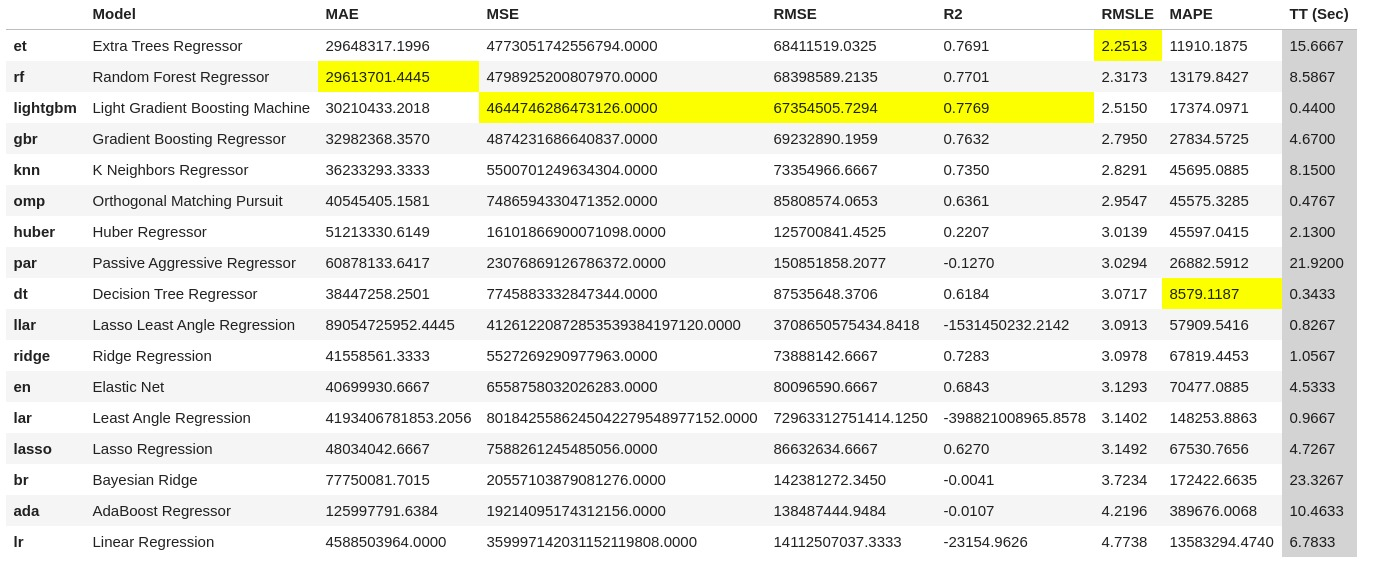

We tried to use pycaret tune_model function to find better hyperparameters for the top 3 regressors which all of them are variations of decision tree.<br>
Using pycaret's tune_model function we tried different values for "max_depth", "max_features" and criterions like gini and entropy.<br>
Appearently it did not lead to any significant improvement.


The algorithm Extra trees got the best RMSLE result so we chose him for the competition part.<br>
Extra Trees is similar to Random Forest i.e. ensemble of many decision trees but for every decision tree it uses the whole data and for the split it makes random splits for random subset of features and choose the optimal one (according to gini/entropy measure).

This is the result of the hyperparamater tuning of the selected model:
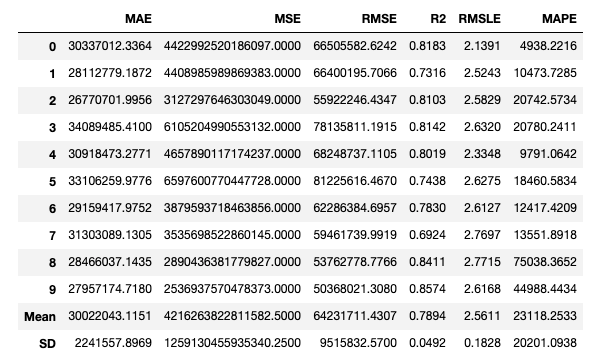


Were we aventually reached a RMSLE of 2.061 on the test set.